# Linear Regression 예

In [73]:
import numpy as np
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display

from sklearn.preprocessing import MinMaxScaler


In [3]:
#선형회귀(최소제곱법)¶
#단순 데이터 (make_wav) 사용 

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)  #선형회귀(최소제곱법)로 예측함수 추정

w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 결과
# 훈련세트와 테스트세트의 성능이 낮으면서 유사한 경우는 과소적합상태임.
# 입력데이터의 차원이 매우 낮아서 과소적합됨 
#w (lr.coef_): [0.39390555]
#b (lr.intercept_): -0.031804343026759746
#훈련 세트 점수: 0.67
#테스트 세트 점수: 0.66

w (lr.coef_): [0.39390555]
b (lr.intercept_): -0.031804343026759746
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


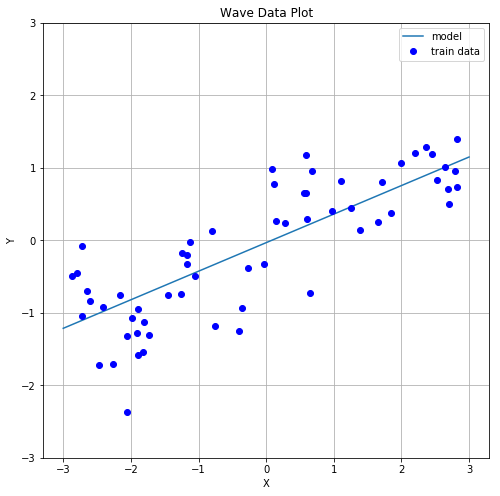

In [39]:
#mglearn.plots.plot_linear_regression_wave()

line = np.linspace(-3, 3, 100).reshape(-1, 1)
plt.figure(figsize=(8, 8))
plt.plot(line, lr.predict(line)) #선형회귀로 추정된 선형함수(모델)로 출력값 생성
plt.plot(X, y, 'o', c='blue')    #학습 데이터
plt.ylim(-3, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Wave Data Plot")
plt.legend(["model", "train data"], loc="best")
plt.grid()
plt.show()

In [6]:
#boston 데이터 사용
boston= ds.load_boston()

print("데이터의 형태:", boston.data.shape)
print("특성 이름:\n", boston.feature_names)
print("데이터 설명:\n", boston.DESCR)

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)

lr = LinearRegression().fit(X_train, y_train)


w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

#result
#
#훈련 세트 점수: 0.77
#테스트 세트 점수: 0.64

데이터의 형태: (506, 13)
특성 이름:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
데이터 설명:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      

In [31]:
# 0-1사이로 데이터 변환

scalar = MinMaxScaler()  #
scalar.fit(X_train)    #최대, 최소 계산
X_train_scaled  = scalar.transform(X_train) #스케일 조정

X_test_scaled  = scalar.transform(X_test) #스케일 조정

lr = LinearRegression().fit(X_train_scaled, y_train)


w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test_scaled, y_test)))


#result
#훈련 세트 점수: 0.71
#테스트 세트 점수: 0.65

w (lr.coef_): [ 22.61526849  -7.74325467  -7.18744879 -22.97218316  -3.13257959]
b (lr.intercept_): 25.91691314333244
훈련 세트 점수: 0.71
테스트 세트 점수: 0.65


### 상관도 높은 특징 추출

correlation / scatter plot 확인

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

INDUS     -0.483725
RM         0.695360
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

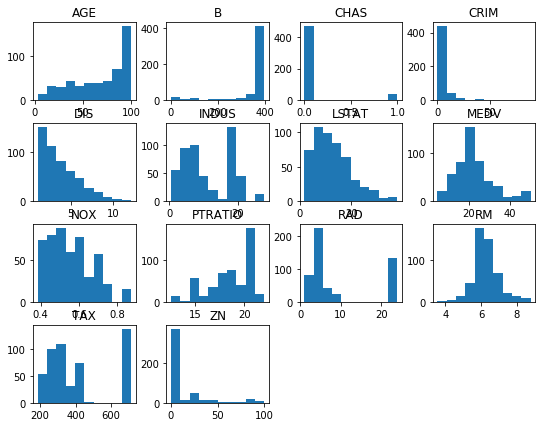

In [99]:
#데이터 프레임 작성
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

#모든 특징들의 분포 확인
df.hist(bins=10,figsize=(9,7),grid=False);

#주택가격과 개별 특징들과의 관계 확인을 위한 correlation 
corr=df.corr(method='pearson')
display(corr)

corrMEDV = corr['MEDV']
display(corrMEDV)

sub = corrMEDV[corrMEDV.abs() > 0.45]
display(sub)

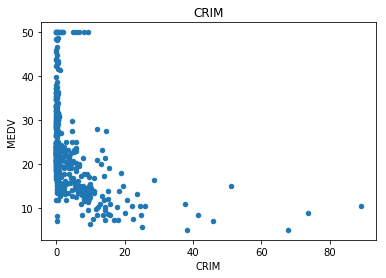

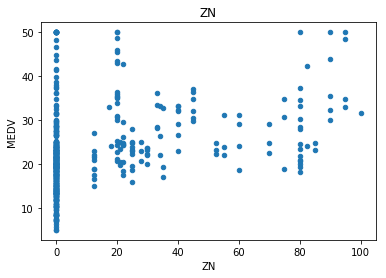

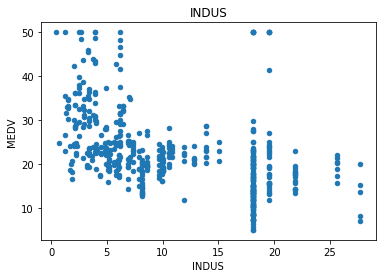

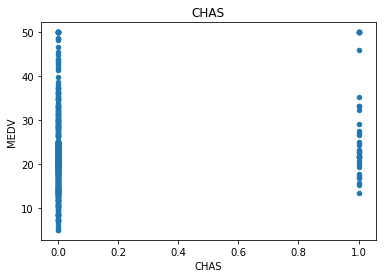

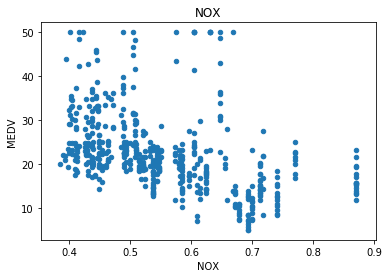

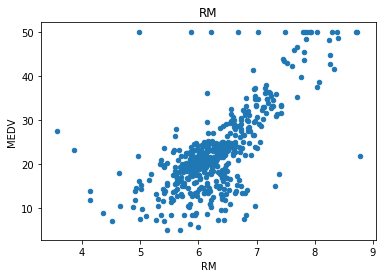

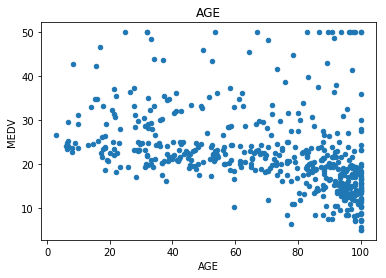

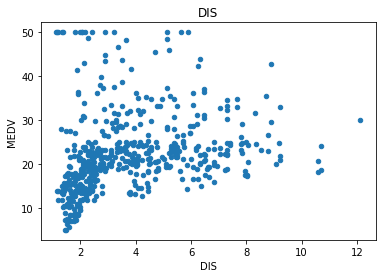

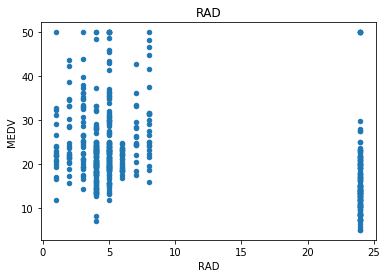

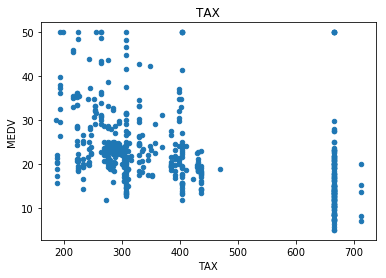

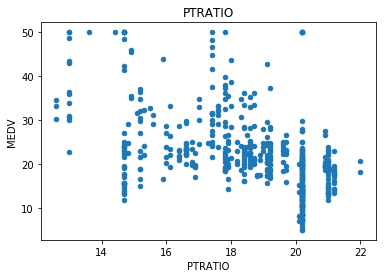

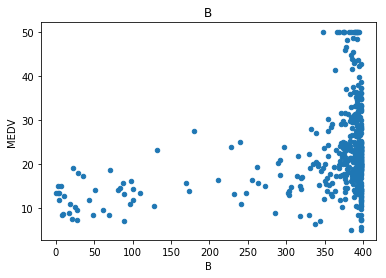

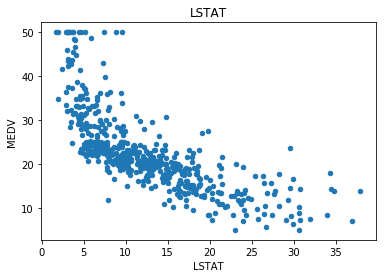

In [63]:
#주택가격과 개별 특징들과의 관계 확인을 위한 scatter plot

# 모든 특징들에 대한 scatter plot 
for f in boston.feature_names:
    df.plot(x=f,y='MEDV',kind='scatter')
    plt.title(f)
    plt.show()
    
    

# 일반적인 산포도
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('Crime rate')
plt.show()

#log 적용 산포도
#log scale
df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()



Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')
   INDUS     RM    TAX  PTRATIO  LSTAT  MEDV
0   2.31  6.575  296.0     15.3   4.98  24.0
1   7.07  6.421  242.0     17.8   9.14  21.6
2   7.07  7.185  242.0     17.8   4.03  34.7
3   2.18  6.998  222.0     18.7   2.94  33.4
4   2.18  7.147  222.0     18.7   5.33  36.2


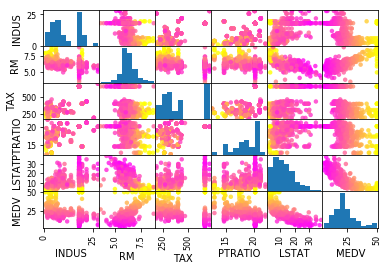

In [66]:
#일부특징만 추출

#df5=df.loc[:,['RM','DIS','PTRATIO', 'LSTAT','MEDV']]

print(sub.index)
df5=df.loc[:, sub.index]

#INDUS     -0.483725  4
#RM         0.695360  2
#TAX       -0.468536  5
#PTRATIO   -0.507787  3
#LSTAT     -0.737663  1
#DIS       -0.24

print(df5.head())

#scatter matrix
pd.plotting.scatter_matrix(df5, c=df5['MEDV'],marker='o',alpha=.8, s=20, cmap='spring')
plt.show()



In [70]:
### 상관도 높은 특징만  추출
#일부특징만 추출

df5=df.loc[:, sub.index]
print(sub.index)   #['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

df4=df.loc[:,['RM','DIS','PTRATIO', 'LSTAT','MEDV']]

print(df5.head())
#scatter matrix
pd.plotting.scatter_matrix(df5, c=df5['MEDV'],marker='o',alpha=.8, s=20, cmap='spring')
plt.show()

print(df4.head())
#scatter matrix
pd.plotting.scatter_matrix(df4, c=df4['MEDV'],marker='o',alpha=.8, s=20, cmap='spring')
plt.show()



X5=df5.drop(['MEDV'], axis = 1)
X4=df4.drop(['MEDV'], axis = 1)
y=df['MEDV']
         
X_train, X_test, y_train, y_test = train_test_split(X5, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)  #선형회귀(최소제곱법)로 예측함수 추정

w = lr.coef_       #계수
b = lr.intercept_  #절편
print("features 5 : INDUS, RM, TAX,PTRATIO, LSTAT")
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


X_train, X_test, y_train, y_test = train_test_split(X4, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)  #선형회귀(최소제곱법)로 예측함수 추정

w = lr.coef_       #계수
b = lr.intercept_  #절편
print("features 4: RM,DIS,PTRATIO, LSTAT")
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')
features 5 : INDUS, RM, TAX,PTRATIO, LSTAT
w (lr.coef_): [ 9.25122947e-02  4.92834291e+00 -4.65872491e-03 -7.90155444e-01
 -5.78294571e-01]
b (lr.intercept_): 14.27071313445796
훈련 세트 점수: 0.69
테스트 세트 점수: 0.63
features 4: RM,DIS,PTRATIO, LSTAT
w (lr.coef_): [ 4.51586089 -0.54956759 -0.89632445 -0.6729053 ]
b (lr.intercept_): 21.210753525236974
훈련 세트 점수: 0.70
테스트 세트 점수: 0.65
